In [1]:
import xml.etree.ElementTree as ET
import os
import glob

In [17]:
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

import tensorflow_datasets as tfds

import copy
import cv2
from PIL import Image, ImageDraw
input_image = copy.deepcopy(input_image)

In [2]:
path1 = '/home/ssac26/hackerton3/datapreprocess'

In [3]:
foldername = 'Bbox_0003'

In [4]:
filename = '0617_04.xml'

In [5]:
finalpath = os.path.join(path1, filename)

In [6]:
finalpath

'/home/ssac26/hackerton3/datapreprocess/0617_04.xml'

In [7]:
pwd

'/home/ssac26/hackerton3/datapreprocess'

In [8]:
# 파일 순서대로 읽기
def getimgdir(dir_path):
    image_list = []
    for i in glob.glob(dir_path + '/*.jpg'):
        image_list.append(i)
    
    return image_list

In [10]:
# custom annotation format to yolov4
def convert(box, size=(224,224)):
    dw = 1./(size[0])
    dh = 1./(size[1])
    x = (box[0] + box[1])/2.0 - 1
    y = (box[2] + box[3])/2.0 - 1
    w = box[1] - box[0]
    h = box[3] - box[2]
    x = x*dw
    w = w*dw
    y = y*dh
    h = h*dh
    return (x,y,w,h)
    

In [11]:
doc = ET.parse(finalpath)
root = doc.getroot()

In [12]:
aa = root.findall('./image')

In [13]:
for i in root.iter('image'):
    namebox = []
    #print(i.attrib['name'])
    for j in i.iter('box'):
        if j.attrib['label']=='person':
            #with open(i.attrib['name'] +  '.txt', 'w') as w_file:
               # w_file.write(j.attrib.text)
            print(i.attrib['name'])
            bbox_x1 = float(j.attrib['xtl'])
            bbox_y1 = float(j.attrib['ytl'])
            bbox_x2 = float(j.attrib['xbr'])
            bbox_y2 = float(j.attrib['ybr'])
            print(convert([bbox_x1, bbox_y1, bbox_x2, bbox_y2]),(1920,1080))
            
        #else:
           # continue

        
# yolo labeling format으로 바꿔서 txt로 저장, 중복되는 파일명 제거 (set?)

MP_SEL_000601.jpg
(2.25609375, 2.4413839285714283, -4.482366071428571, -4.289375) (1920, 1080)
MP_SEL_000615.jpg
(2.779174107142857, 2.9591741071428572, -2.397276785714286, -2.2261160714285713) (1920, 1080)
MP_SEL_000616.jpg
(0.75, 1.180580357142857, 0.8660714285714285, 1.2718749999999999) (1920, 1080)
MP_SEL_000616.jpg
(0.6205357142857143, 1.0997767857142857, 1.0089285714285714, 1.5209821428571426) (1920, 1080)
MP_SEL_000616.jpg
(0.8350446428571429, 1.0984375, 1.2611607142857142, 1.3933035714285715) (1920, 1080)
MP_SEL_000625.jpg
(1.9420312499999999, 2.145691964285714, -1.0763839285714287, -1.0354910714285712) (1920, 1080)
MP_SEL_000636.jpg
(4.254241071428571, 4.745758928571428, -6.704910714285714, -6.849553571428572) (1920, 1080)
MP_SEL_000637.jpg
(0.9656249999999998, 1.3200892857142856, 1.4026785714285712, 1.6392857142857145) (1920, 1080)
MP_SEL_000637.jpg
(0.9194196428571428, 1.1674107142857142, 1.6977678571428572, 1.9089285714285715) (1920, 1080)
MP_SEL_000637.jpg
(1.5693526785714

In [14]:
# yolo format된 좌표
test1 = [[2.25609375, 2.4413839285714283, -4.482366071428571, -4.289375]]

In [30]:
# xml상의 좌표
test2 = [[1008.39, 4.34,1028.28, 67.46]]

In [15]:
input_image = os.path.join(path1,'MP_SEL_000601.jpg')

In [16]:
input_image

'/home/ssac26/hackerton3/datapreprocess/MP_SEL_000601.jpg'

In [18]:
img = Image.open(input_image)

In [19]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

In [20]:
proto_tensor = tf.make_tensor_proto(test1)  # convert `tensor a` to a proto tensor
test1_1 = tf.make_ndarray(proto_tensor)

In [21]:
test1_1

array([[ 2.2560937,  2.4413838, -4.482366 , -4.289375 ]], dtype=float32)

In [22]:
#img.show()

In [31]:
#<box label="person" occluded="0" xtl="1008.39" ytl="4.34" xbr="1028.28" ybr="67.46" z_order="0"> </box>
#test1_2 = [[1008.39,4.34,1028.28,67.46]]
proto_tensor2 = tf.make_tensor_proto(test2)  # convert `tensor a` to a proto tensor
proto2 = tf.make_ndarray(proto_tensor2)

In [32]:
def visualize_bbox(input_image, object_bbox):
    input_image = copy.deepcopy(input_image)
    draw = ImageDraw.Draw(input_image)
    # 바운딩 박스 좌표(x_min, x_max, y_min, y_max) 구하기
#     width, height = img.size
#     print('width:', width, ' height:', height)
#     print(object_bbox.shape)
    x_min = object_bbox[:,0]
    x_max = object_bbox[:,1]
    y_min = object_bbox[:,2]
    y_max = object_bbox[:,3]

    # 바운딩 박스 그리기
    rects = np.stack([x_min, y_min, x_max, y_max], axis=1)
    for _rect in rects:
        print(_rect)
        draw.rectangle(_rect, outline=(255,0,0), width=2)
    print(input_image)
    return input_image

In [25]:
# input_image = copy.deepcopy(img)
# draw = ImageDraw.Draw(input_image)
# rects =([proto2[:,0], proto2[:,1], proto2[:,2], proto2[:,3]])
# draw.rectangle(rects, outline=(255,0,0), width=2)


[1008.39 1028.28    4.34   67.46]
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1920x1080 at 0x7F30BC3C3D50>


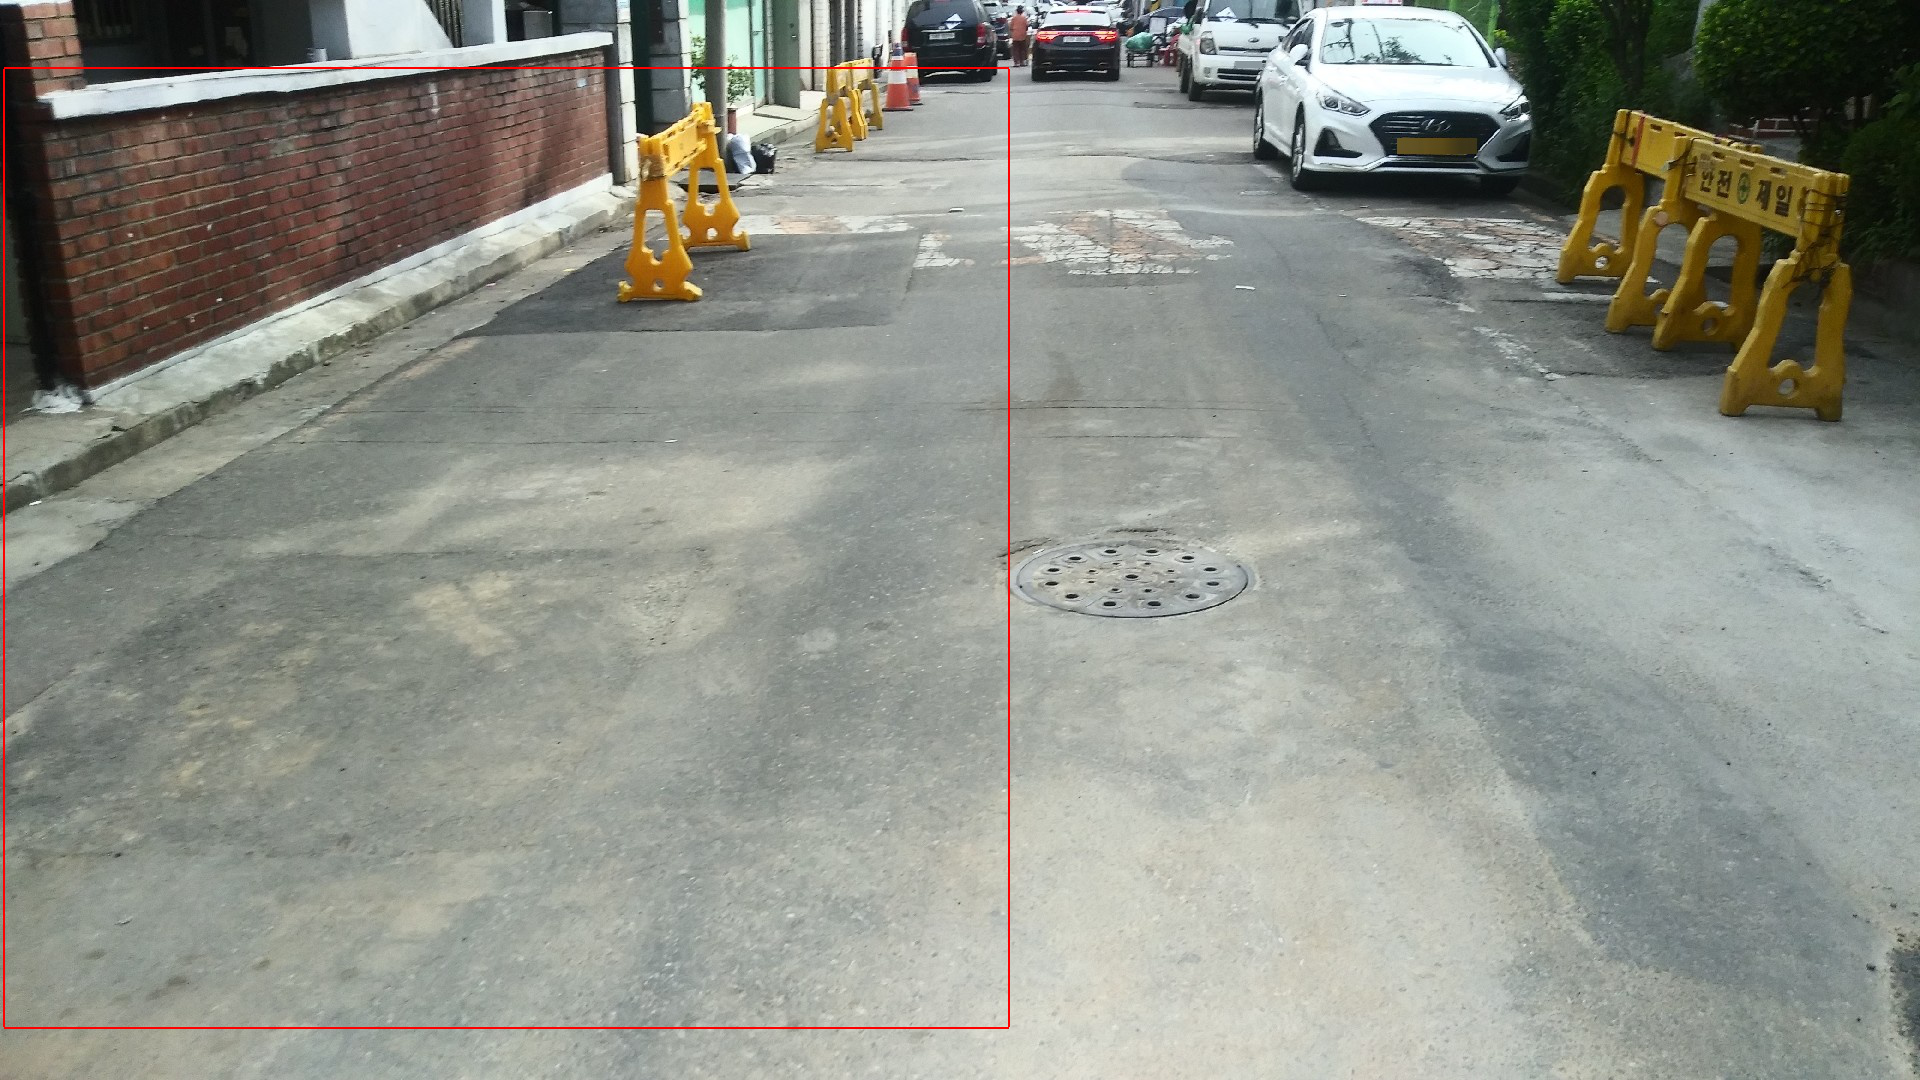

In [33]:
visualize_bbox(img, proto2)